https://www.datacamp.com/community/tutorials/predicting-employee-churn-python

https://machinelearningmastery.com/make-predictions-scikit-learn/

https://rstudio-pubs-static.s3.amazonaws.com/310018_c48473402c9849db85a5ec8e30e258b3.html


# Analyze employee churn


In the past, most of the focus on the ‘rates’ such as attrition rate and retention rates. HR Managers compute the previous rates try to predict the future rates using data warehousing tools. These rates present the aggregate impact of churn, but this is the half picture. 

Employee churn is expensive, the aim is designing better retention plans and improving employee satisfaction.

In this analysis, you are going to cover the following topics:
> 
- Employee Churn Analysis
- Data loading and understanding feature
- Exploratory data analysis and Data visualization
- Cluster analysis
- Building prediction model using Gradient Boosting Tree.
- Evaluating model performance
- Conclusion

Employee churn can be defined as a leak or departure of an intellectual asset from a company or organization.  In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness. Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn. In some cases such as the employee with niche skills are harder to replace. It affects the ongoing work and productivity of existing employees. Acquiring new employees as a replacement has its costs such as hiring costs and training costs. Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee. Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

Employee churn has unique dynamics. It helps us in designing better employee retention plans and improving employee satisfaction. Data science algorithms can predict the future churn.

## Exploratory Analysis
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [1]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

In [2]:
data=pandas.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
- No variable column has null/missing values.

You can describe 10 attributes in detail as:

- **satisfaction_level**: It is employee satisfaction point, which ranges from 0-1.
- **last_evaluation**: It is evaluated performance by the employer, which also ranges from 0-1.
- **number_projects**: How many numbers of projects assigned to an employee?
- **average_monthly_hours**: How many average numbers of hours worked by an employee in a month?
- **time_spent_company**: time_spent_company means employee experience. The number of years spent by an employee in the company.
- **work_accident**: Whether an employee has had a work accident or not.
- **promotion_last_5years**: Whether an employee has had a promotion in the last 5 years or not.
- **Departments**: Employee's working department/division.
- **Salary**: Salary level of the employee such as low, medium and high.
- **left**: Whether the employee has left the company or not.

## Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. 

In [7]:
# find the average of both the groups using groupby() and mean() function.

left = data.groupby('left')
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [8]:
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can interpret, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Visualization

Employees Left

Let's check how many employees were left?

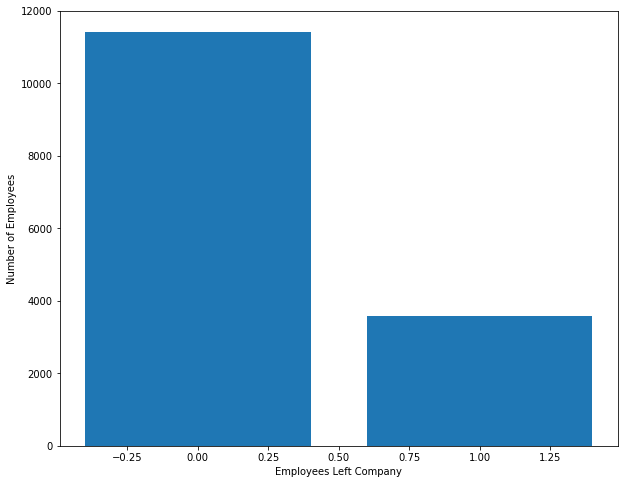

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

left_count=data.groupby('left').count()

plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [11]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In the graph we can see that of 15,000 employees:
> 
- left:     3571  
- stayed:  11428

This is the 23.8% they left the job

### Number of Projects
Similarly, you can also plot a bar graph to count the number of employees deployed on How many projects?

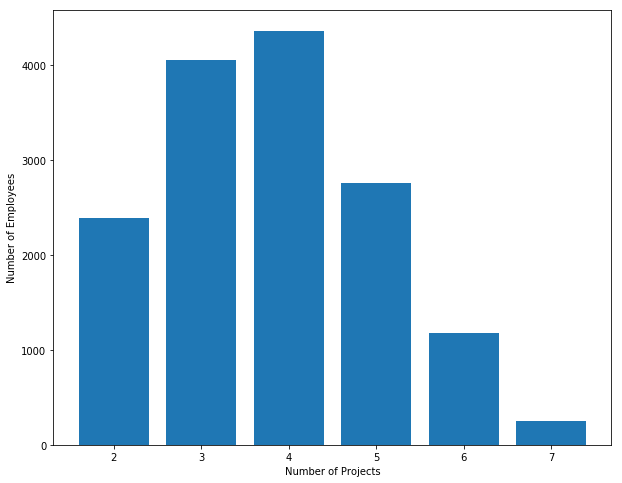

In [12]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

### Time Spent in Company
Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

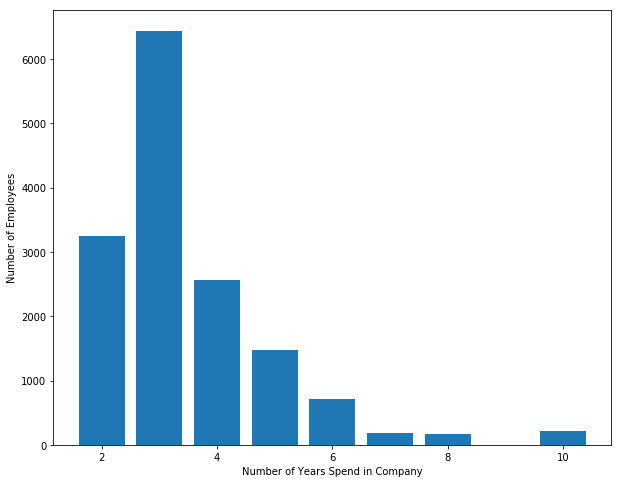

In [13]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

## Analyze the features one by one

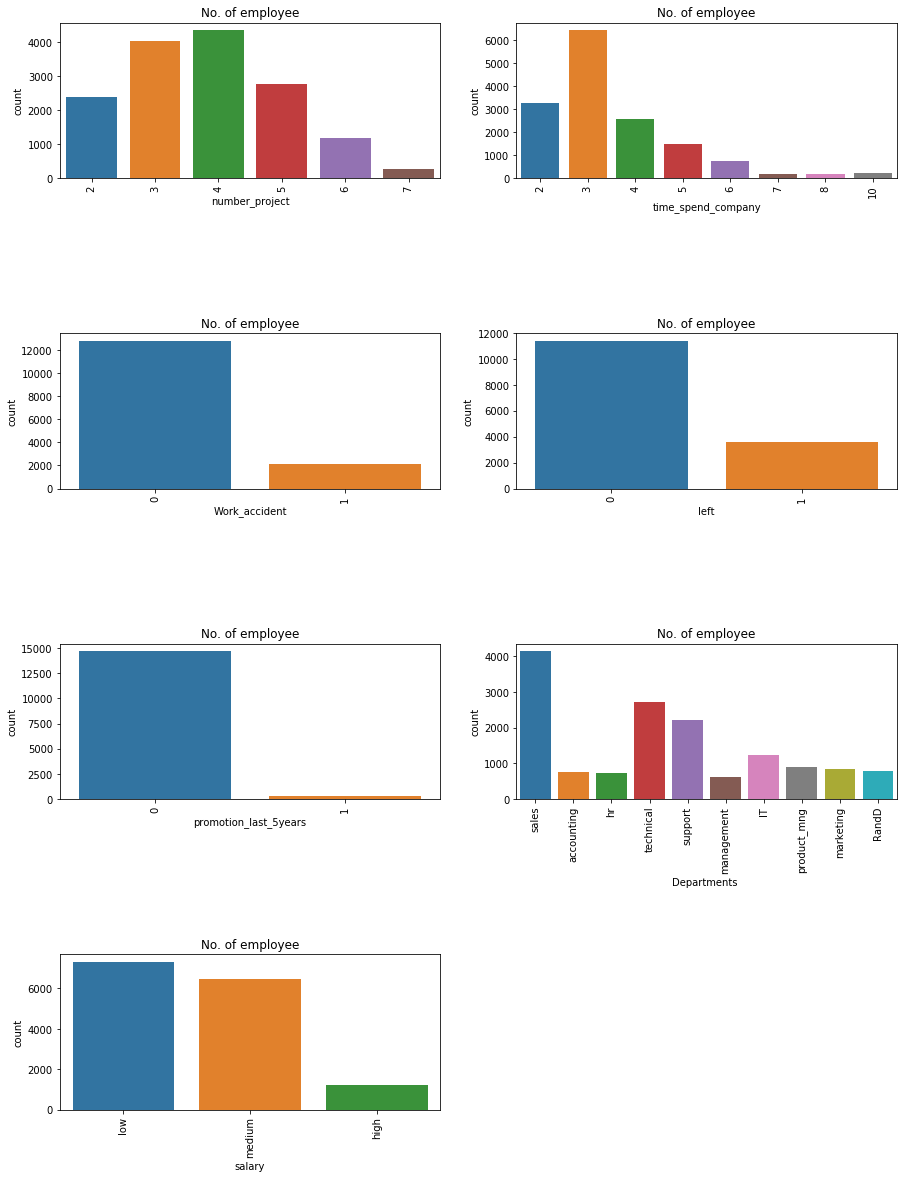

In [14]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']


fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:
> 
- Most of the employee is doing the project from 3-5.
- There is a huge drop between 3 years and 4 years experienced employee.
- The no of employee left is 23 % of the total employment.
- A decidedly less number of employee get the promotion in the last 5 year.
- The sales department is having maximum no.of employee followed by technical and support
- Most of the employees are getting salary either medium or low.

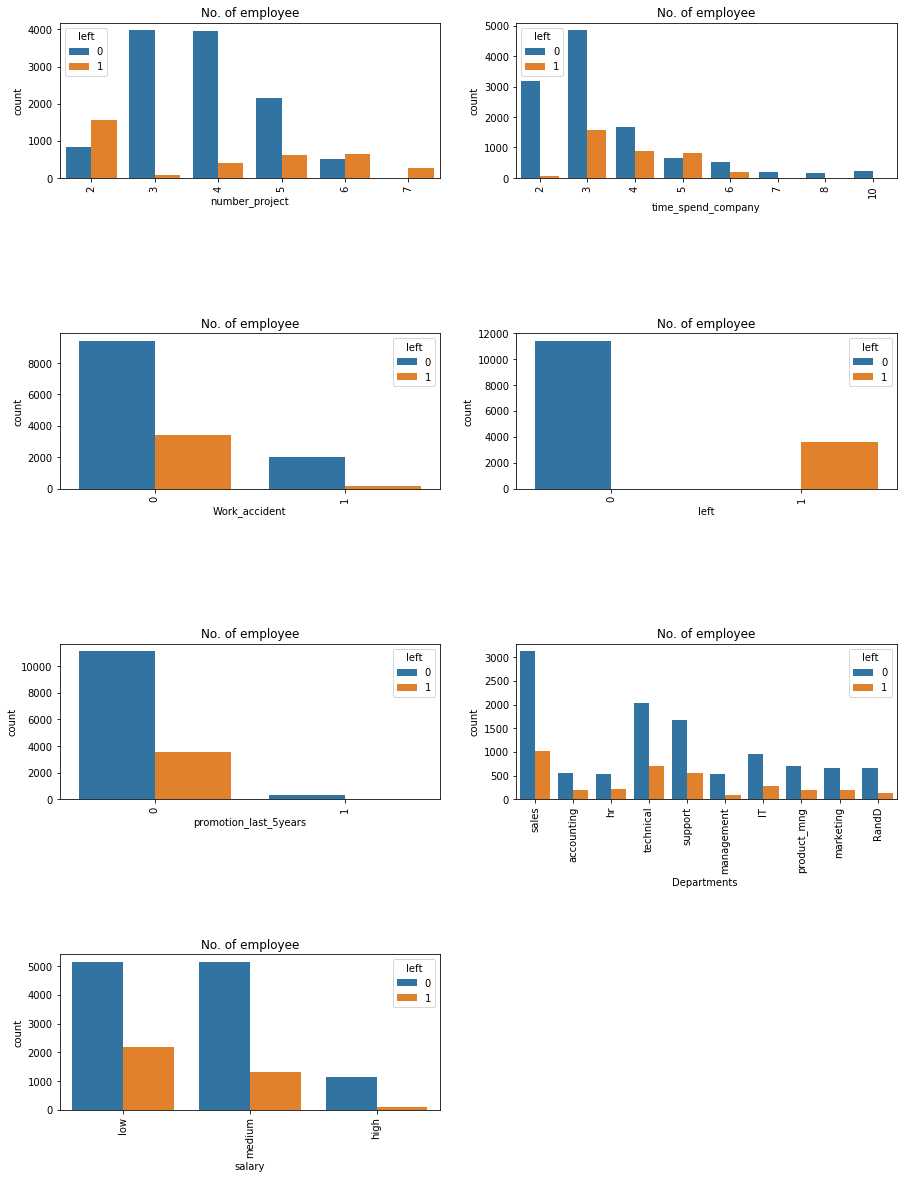

In [15]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:
> 
- Those employees who have the number of projects more than 5 were left the company.
- The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
- The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
- Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## Data Analysis and Visualization Summary:
Following features are most influencing a person to leave the company:

- Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.


- Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.


- Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.


- Salary: Most of the employees that quit among the mid or low salary groups.

## Cluster Analysis:
Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [16]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

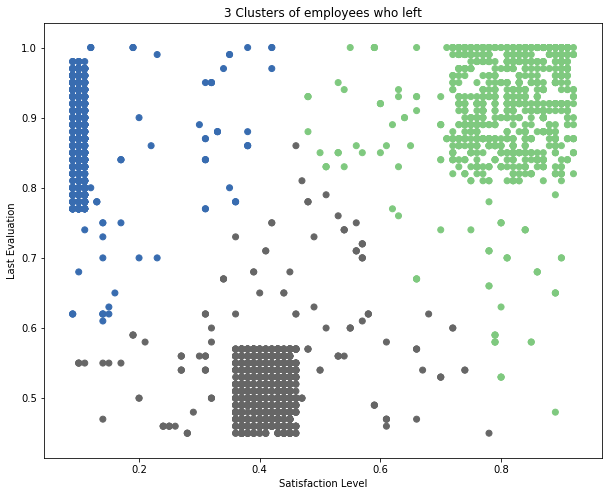

In [17]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:
> 
- High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
- Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
- Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

## Building a Prediction Model
Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2.


In [18]:
# This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder

'''Here, you imported preprocessing module and created Label Encoder object. 
Using this LabelEncoder object you fit and transform "salary" and "Departments " column into numeric column.'''

# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder transform "salary" and "Departments " column into numeric column.
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

In [19]:
data['salary'].head(20)

0     1
1     2
2     2
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: salary, dtype: int64

In [20]:
data['Departments ']

0        7
1        7
2        7
3        7
4        7
5        7
6        7
7        7
8        7
9        7
10       7
11       7
12       7
13       7
14       7
15       7
16       7
17       7
18       7
19       7
20       7
21       7
22       7
23       7
24       7
25       7
26       7
27       7
28       2
29       2
        ..
14969    7
14970    7
14971    7
14972    2
14973    2
14974    2
14975    3
14976    3
14977    3
14978    3
14979    9
14980    9
14981    9
14982    9
14983    9
14984    9
14985    9
14986    9
14987    9
14988    9
14989    9
14990    8
14991    8
14992    8
14993    8
14994    8
14995    8
14996    8
14997    8
14998    8
Name: Departments , Length: 14999, dtype: int64

In [21]:
data['left']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    1
14985    1
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [40]:
d = data['left']

In [57]:
d.count()

14999

In [42]:
len(d)

14999

In [65]:
a = []
b = []
for i in d:
    if i == 0:
        a.append(i)
    else:
        b.append(i)
print(len(a))
print(len(b))

11428
3571


In [66]:
'''Split Train and Test Set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). 

You need to pass 3 parameters features, target, and test_set size. 
Additionally, you can use random_state to select records randomly.'''

#Spliting data into Feature and
X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=data['left']

In [67]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [68]:
y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
14969    1
14970    1
14971    1
14972    1
14973    1
14974    1
14975    1
14976    1
14977    1
14978    1
14979    1
14980    1
14981    1
14982    1
14983    1
14984    1
14985    1
14986    1
14987    1
14988    1
14989    1
14990    1
14991    1
14992    1
14993    1
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [69]:
e = []
f = []
for i in y:
    if i == 0:
        e.append(i)
    else:
        f.append(i)
print(len(a))
print(len(b))

11428
3571


In [70]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [72]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
12602,0.10,0.84,7,250,4,0,0,6,1
4889,0.57,0.68,4,154,3,1,0,4,2
1572,0.39,0.48,2,154,3,0,0,9,1
13375,0.91,0.68,4,132,4,0,0,0,2
879,0.82,0.97,5,263,5,0,0,9,2


In [73]:
X_train.shape

(10499, 9)

In [75]:
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
6723,0.65,0.96,5,226,2,1,0,5,2
6473,0.88,0.80,3,166,2,0,0,0,1
4679,0.69,0.98,3,214,2,0,0,7,1
862,0.41,0.47,2,154,3,0,0,7,1
7286,0.87,0.76,5,254,2,1,0,3,1


In [76]:
X_test.shape

(4500, 9)

In [78]:
y_train.head()

12602    1
4889     0
1572     1
13375    0
879      1
Name: left, dtype: int64

In [77]:
y_train.shape

(10499,)

In [79]:
y_test.head()

6723    0
6473    0
4679    0
862     1
7286    0
Name: left, dtype: int64

In [80]:
y_test.shape

(4500,)

In [81]:
g = []
h = []
for i in y_test:
    if i == 0:
        g.append(i)
    else:
        h.append(i)
print(len(g))
print(len(h))

3428
1072


## Model Building
Let's build employee an churn prediction model.

Here, you are going to predict churn using Gradient Boosting Classifier.

First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function.


> 
from sklearn.ensemble import GradientBoostingClassifier

>       
gb = GradientBoostingClassifier()

>       
gb.fit(X_train, y_train)

>        
y_pred = gb.predict(X_test)

In [82]:
# Then, fit your model on train set using fit() and perform prediction on the test set using predict()

#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [83]:
gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [84]:
#Train the model using the training sets
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [85]:
#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [86]:
y_pred.shape

(4500,)

In [87]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
r = []
s = []
for i in y_pred:
    if i == 0:
        r.append(i)
    else:
        s.append(i)
print(len(r))
print(len(s))

3470
1030


## Evaluating Model Performance

In [43]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9713333333333334
Precision: 0.9573229873908826
Recall: 0.9207089552238806
